## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Кравчук Євгеній
- Сень Іван

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [4]:
class NodeTree:
    def __init__(self, left, right):
        self.left = left 
        self.right = right

    def children(self):
        return (self.left, self.right)

In [31]:
class Huffman:
    def calculate_frequency(self, iterable):
        freq = {}
        for symb in iterable:
            if symb in freq:
                freq[symb] += 1
            else:
                freq[symb] = 1

        return sorted(freq.items(), key=lambda x: x[1], reverse=True)

    def build_tree(self, freq):
        nodes = freq.copy()
        while len(nodes) > 1:
            (symb1, count1) = nodes[-1]
            (symb2, count2) = nodes[-2]
            nodes = nodes[:-2]
            node = NodeTree(symb1, symb2)
            nodes.append((node, count1+count2))

            nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
        return nodes

    def huffman_code_tree(self, node, left=True, binString=''):
        if isinstance(node, str):
            return {node: binString}
        if isinstance(node, tuple) and len(node) == 3:
            return {node: binString}
        (left_node, right_node) = node.children()
        final_dict = dict()
        final_dict.update(self.huffman_code_tree(left_node, True, binString + '0'))
        final_dict.update(self.huffman_code_tree(right_node, False, binString + '1'))
        return final_dict

    def get_code_dict(self, text):
        frequency_list = self.calculate_frequency(text)
        all_nodes = self.build_tree(frequency_list)
        huffman_code = self.huffman_code_tree(all_nodes[0][0])
        return huffman_code

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        frequency_list = self.calculate_frequency(text)
        all_nodes = self.build_tree(frequency_list)
        huffman_code = self.huffman_code_tree(all_nodes[0][0])
        encoded_text = ""
        for symb in text:
            encoded_text += huffman_code[symb]
        return encoded_text

    def decode(self, code: str, coding_dict: dict[str, str]):
        counter = 1
        decode_list = []
        while True:
            if code[0:counter] in coding_dict.values():
                decode_list.append(list(coding_dict.keys())[list(coding_dict.values()).index(code[0:counter])])
                code = code[counter:]
                counter = 0
                if not code:
                   return decode_list
                continue
            counter +=1

In [6]:
def get_text_from_file(file_name):
    with open(file_name, "r", encoding="utf-8") as f:
        return f.read()

In [37]:
text = get_text_from_file("small_test.txt")

huffman_code_obj = Huffman()
encoded = huffman_code_obj.encode(text)
print(encoded)
code_dict = huffman_code_obj.get_code_dict(text)
decoded = huffman_code_obj.decode(encoded, code_dict)
print("".join(decoded))

1000010100111110111001000111011110000010101001000111001001011110110011111011111010101111010111011100001001010101110111101011001111100011010001101100101001010110011011111011100100111110000011111010101101111100011000011110001011011110101010001101000010111100111111010011101010010011100011001111110100001011110100111011111000101010011011101001100100011101000111110000111000010011010001001101101101010001000100000001101110100011000001011000111000110011100111000011000010011111011010010110111011010011011110001111001000110000010110001110111011000011110101010101110110011011100111110111001001010101110111101111111010110100101101111101011000110111011111010110111010110011101111010100111101001111001100011010110100011001011001101110010001101000010110100101100110111011001110011110111000011011110111111011011100101110011101010011110000111011111000111000000101110010101111110010001010001100000100111101110011100001100110101101010001010011100100111111110000111010001001101101100001111010101010111011010100111101

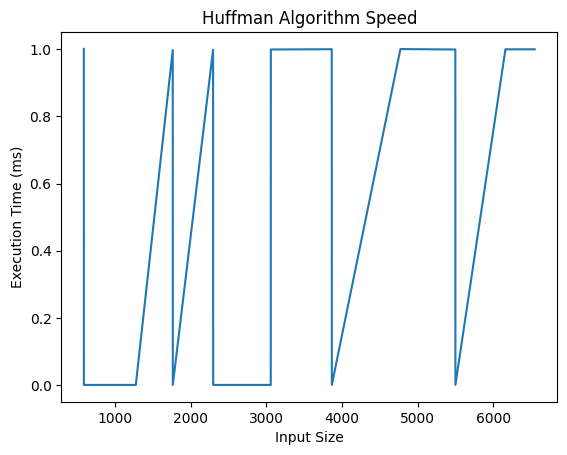

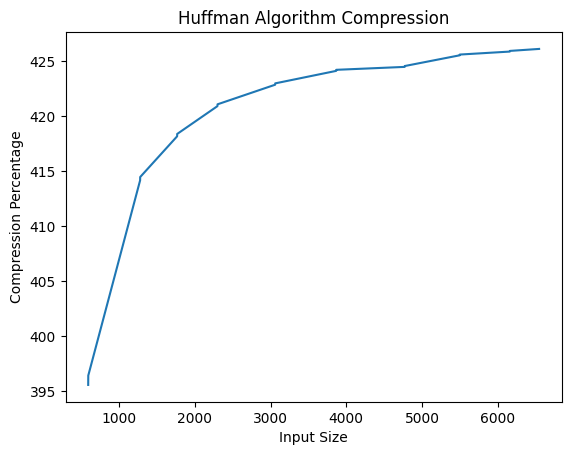

In [8]:
import matplotlib.pyplot as plt
import time
import sys

huffman_code = Huffman()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("huge_test.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = huffman_code.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Huffman Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('Huffman Algorithm Compression')
plt.show()

плюси:
- Алгоритм Гаффмана ефективний в роботі над об'ємними файлами
- Особливо над текстовими файлами 
- Алгоритм Гаффмана є гарним вибором коли безвтратність даних грає велику роль. 

мінуси:
- Алгоритм Гаффмана - повільний
- Погано працює з частково стиснутими даними

# Алгоритм LZW

In [9]:
class LZW:
    def encode(self, text: str):
        coding_dict = {}
        for i in range(256):
            coding_dict[chr(i)] = i
        result = []
        curr = ""
        while text:
            if curr + text[0] in coding_dict:
                curr += text[0]
            else:
                result.append(coding_dict[curr])
                coding_dict[curr + text[0]] = len(coding_dict)
                curr = text[0]
            text = text[1:]
        result.append(coding_dict[curr])
        return result, list(coding_dict.keys())

    def decode(self, code: str) -> str:
        code = code[0]
        coding_dict = {}
        for i in range(256):
            coding_dict[i] = chr(i)
        result = ""
        old = code[0]
        result += coding_dict[old]
        code = code[1:]
        while code:
            new = code[0]
            if new in coding_dict:
                result += coding_dict[new]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[new][0]
            else:
                result += coding_dict[old] + coding_dict[old][0]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[old][0]
            old = new
            code = code[1:]
        return result

In [10]:
class LZW:
    def encode(self, text: str):
        coding_dict = {}
        for i in range(256):
            coding_dict[chr(i)] = i
        result = []
        curr = ""
        while text:
            if curr + text[0] in coding_dict:
                curr += text[0]
            else:
                result.append(coding_dict[curr])
                coding_dict[curr + text[0]] = len(coding_dict)
                curr = text[0]
            text = text[1:]
        result.append(coding_dict[curr])
        return result, list(coding_dict.keys())

    def decode(self, code: str) -> str:
        code = code[0]
        coding_dict = {}
        for i in range(256):
            coding_dict[i] = chr(i)
        result = ""
        old = code[0]
        result += coding_dict[old]
        code = code[1:]
        while code:
            new = code[0]
            if new in coding_dict:
                result += coding_dict[new]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[new][0]
            else:
                result += coding_dict[old] + coding_dict[old][0]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[old][0]
            old = new
            code = code[1:]
        return result

In [11]:
lorem_ipsum_lines = []
with open("small_test.txt", "r", encoding="utf-8") as file:
    for line in file:
        if line.strip() == "":
            continue
        lorem_ipsum_lines.append(line.strip())
encoded_ipsum = []
decoded_ipsum = []
# print(lorem_ipsum_lines)
lzw = LZW()
for line in lorem_ipsum_lines:
    encoded_ipsum.append(lzw.encode(line))
    decoded_ipsum.append(lzw.decode(encoded_ipsum[-1]))
# encoded_ipsum, coding_dict = lzw.encode(lorem_ipsum_lines[0])
# print(lzw.encode(encoded_ipsum))
for line in lorem_ipsum_lines:
    print(line == decoded_ipsum[lorem_ipsum_lines.index(line)])

True


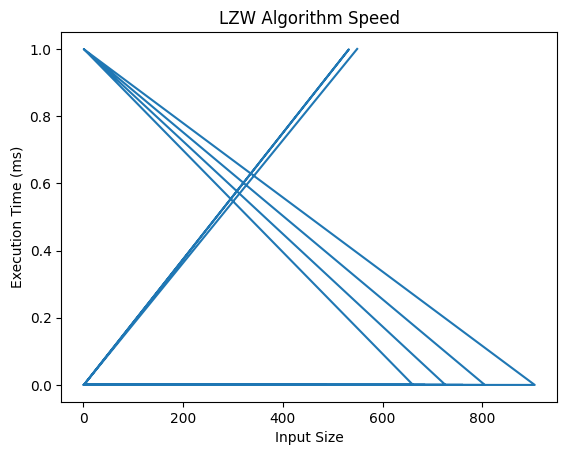

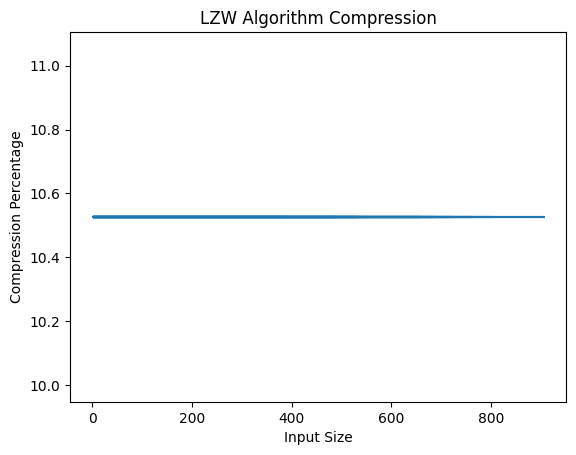

In [12]:
import matplotlib.pyplot as plt
import time

lzw = LZW()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("huge_test.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

for line in input_data:

    start_time = time.time()
    encoded_data = lzw.encode(line)
    size = len(line)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / len(input_data)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('LZW Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('LZW Algorithm Compression')
plt.show()


# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [13]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
    
    def encode(self, text: str) -> str:
        encoded = []
        window = 0

        while window < len(text):
            best_offset = -1
            best_length = -1
            best_match = ''

            for length in range(1, min(len(text) - window, self.buffer_size)):
                substring = text[window:window + length]
                offset = text.rfind(substring, max(0, window - self.buffer_size), window)

                if offset != -1 and length > best_length:
                    best_offset = window - offset
                    best_length = length
                    best_match = substring

            if best_match:
                encoded.append((best_offset, best_length, text[window + best_length]))
                window += best_length + 1
            else:
                encoded.append((0, 0, text[window]))
                window += 1
        return encoded

    def decode(self, code: str) -> str:
        decompressed = ''
        window = 0

        while window < len(code):
            offset, length, char = code[window]

            if offset == 0:
                decompressed += char
                window += 1
            else:
                start = len(decompressed) - offset
                for i in range(length):
                    decompressed += decompressed[start + i]
                decompressed += char
                window += 1
        return decompressed

In [14]:
lorem_ipsum_lines = []
with open("huge_test.txt") as f:
    for line in f:
        if line.strip() == "":
            continue
        lorem_ipsum_lines.append(line.strip())

encoded = []
decoded = []
lz77 = LZ77(5)
for line in lorem_ipsum_lines:
    encoded.append(lz77.encode(line))
    decoded.append(lz77.decode(encoded[-1]))
print(encoded)
print(decoded)
print(decoded == lorem_ipsum_lines)


[[(0, 0, 'L'), (0, 0, 'o'), (0, 0, 'r'), (0, 0, 'e'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'i'), (0, 0, 'p'), (0, 0, 's'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'd'), (0, 0, 'o'), (0, 0, 'l'), (2, 1, 'r'), (0, 0, ' '), (0, 0, 's'), (0, 0, 'i'), (0, 0, 't'), (4, 1, 'a'), (0, 0, 'm'), (0, 0, 'e'), (5, 1, ','), (0, 0, ' '), (0, 0, 'c'), (0, 0, 'o'), (0, 0, 'n'), (0, 0, 's'), (0, 0, 'e'), (5, 1, 't'), (3, 1, 't'), (0, 0, 'u'), (0, 0, 'r'), (0, 0, ' '), (0, 0, 'a'), (0, 0, 'd'), (0, 0, 'i'), (0, 0, 'p'), (2, 1, 's'), (0, 0, 'c'), (3, 1, 'n'), (0, 0, 'g'), (0, 0, ' '), (0, 0, 'e'), (0, 0, 'l'), (0, 0, 'i'), (0, 0, 't'), (0, 0, '.'), (0, 0, ' '), (0, 0, 'Q'), (0, 0, 'u'), (0, 0, 'i'), (0, 0, 's'), (0, 0, 'q'), (4, 1, 'e'), (0, 0, ' '), (2, 1, 'u'), (0, 0, 'i'), (0, 0, 's'), (0, 0, 'm'), (0, 0, 'o'), (0, 0, 'd'), (0, 0, ' '), (0, 0, 'i'), (0, 0, 'n'), (0, 0, 't'), (0, 0, 'e'), (0, 0, 'r'), (0, 0, 'd'), (0, 0, 'u'), (0, 0, 'm'), (0, 0, ' '), (0, 0, 'n'), (0, 0, 'i'), (0, 0, 'b'), (0, 0, 'h'

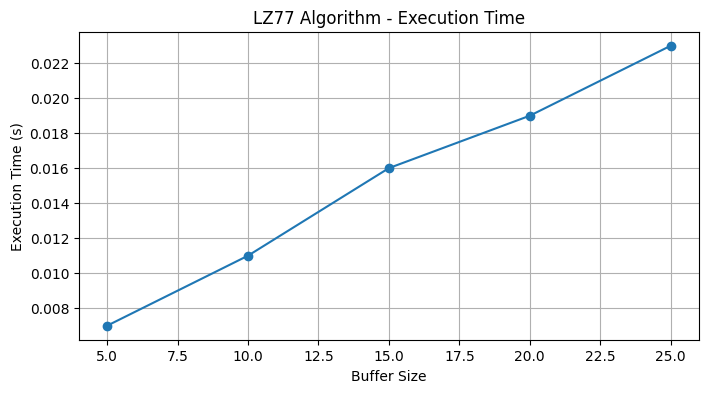

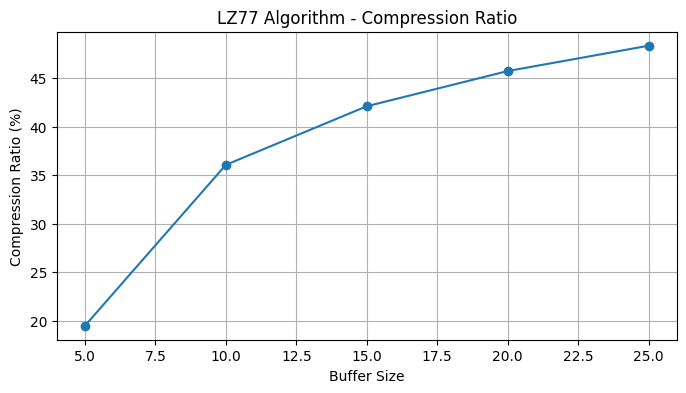

In [15]:
import matplotlib.pyplot as plt
import time


# Define the function to measure execution time
def measure_execution_time(text: str, algorithm: LZ77) -> float:
    start_time = time.time()
    algorithm.encode(text)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time

# Define the function to measure compression ratio
def measure_compression_ratio(original_text: str, compressed_text: str) -> float:
    original_size = len(original_text)
    compressed_size = len(compressed_text)
    compression_ratio = (original_size - compressed_size) / original_size * 100
    return compression_ratio

# Define the text to be encoded
with open("huge_test.txt") as f:
    text = f.read()

# Define the buffer sizes to be tested
buffer_sizes = [5, 10, 15, 20, 25]

# Initialize lists to store the execution times and compression ratios
execution_times = []
compression_ratios = []

# Create an instance of the LZ77 algorithm for each buffer size and measure the execution time and compression ratio
for buffer_size in buffer_sizes:
    lz77 = LZ77(buffer_size)
    encoded_text = lz77.encode(text)
    execution_time = measure_execution_time(text, lz77)
    compression_ratio = measure_compression_ratio(text, encoded_text)
    execution_times.append(execution_time)
    compression_ratios.append(compression_ratio)

# Plot the execution times
plt.figure(figsize=(8, 4))
plt.plot(buffer_sizes, execution_times, marker='o')
plt.xlabel('Buffer Size')
plt.ylabel('Execution Time (s)')
plt.title('LZ77 Algorithm - Execution Time')
plt.grid(True)
plt.show()

# Plot the compression ratios
plt.figure(figsize=(8, 4))
plt.plot(buffer_sizes, compression_ratios, marker='o')
plt.xlabel('Buffer Size')
plt.ylabel('Compression Ratio (%)')
plt.title('LZ77 Algorithm - Compression Ratio')
plt.grid(True)
plt.show()


LZ77 is simple compresion algorithm which leaves details of implementation to programmer. It's power lies in compresing repetetive data such as network data transmision, images, storage optimizations.

# Алгоритм Deflate

In [34]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.huffman_encoder = Huffman()
        self.lz77_encoder = LZ77(buffer_size)

    def get_coding_list(self, text):
        lz77_encoded = self.lz77_encoder.encode(text)
        huffman_dict = self.huffman_encoder.get_code_dict(lz77_encoded)
        return huffman_dict

    def encode(self, text: str) -> str:
        lz77_encoded = self.lz77_encoder.encode(text)
        huffman_encoded = self.huffman_encoder.encode(lz77_encoded)
        return huffman_encoded

    def decode(self, code: str, code_dict: dict) -> str:
        huffman_decoded = self.huffman_encoder.decode(code, code_dict)
        fully_decoded = self.lz77_encoder.decode(huffman_decoded)
        return fully_decoded
        

In [35]:
with open("huge_test.txt", "r", encoding="utf-8") as file:
    text = file.read()

deflate = Deflate(5)
huffman_dict = deflate.get_coding_list(text)
en_de = deflate.decode(deflate.encode(text), huffman_dict)
print(en_de)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque euismod interdum nibh nec semper. In eu vehicula urna. In a massa laoreet, iaculis eros ac, sodales nulla. Nulla viverra at quam in pretium. Vivamus sed diam nec massa sodales pellentesque. Mauris ac nisl elit. Sed at dictum diam, vel vestibulum augue. Maecenas porta dignissim placerat. In eget aliquet lorem. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; Vestibulum ut orci ac ex malesuada mollis. Cras lacinia dignissim justo ac volutpat.

Morbi fringilla rhoncus felis, non suscipit nisl fermentum nec. Donec in sodales diam, vitae gravida neque. Praesent gravida blandit orci, quis laoreet nulla sodales ut. Quisque diam orci, tincidunt a nunc eu, tincidunt dictum odio. Curabitur blandit porta enim sed sollicitudin. Nulla at ligula sed orci hendrerit pharetra eget eu magna. In imperdiet ultrices leo, sed placerat erat vulputate a. Cras sit amet magna in nunc viverra placerat nec eget

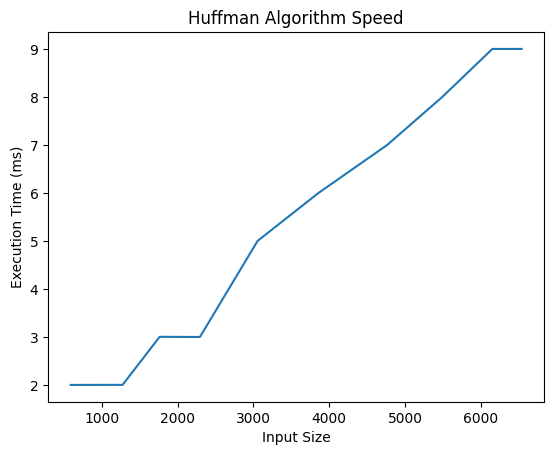

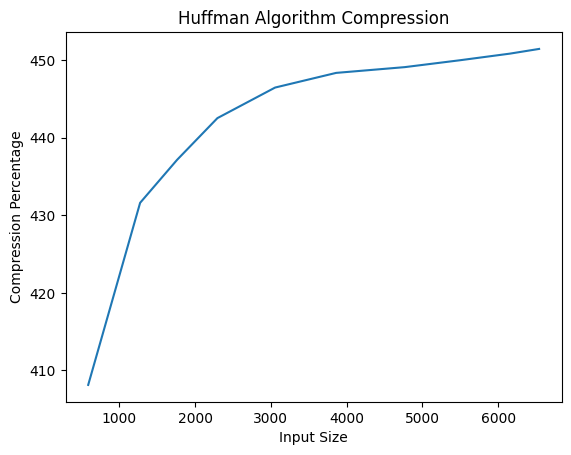

In [39]:
import matplotlib.pyplot as plt
import time
import sys

deflate = Deflate(5)
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("huge_test.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = deflate.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Huffman Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('Huffman Algorithm Compression')
plt.show()

плюси:
- ефективність стиснення
- широке використання
- швидкість роботи

мінуси:
- деградація стиснення
- великі розіміри даних
- обмежена ефективність для деяких типів даних